In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS=set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91944\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re


In [19]:
data=pd.read_csv(r"C:\Users\91944\Downloads\amazon_alexa.tsv",delimiter='\t',quoting=3)
print(f"data shape :{data.shape}")

data shape :(3150, 5)


In [20]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [21]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [22]:
data[data['verified_reviews'].isna()==True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [23]:
data.dropna(inplace=True)

In [24]:
print(f"shape{data.shape}")

shape(3149, 5)


In [25]:
data["length"]=data['verified_reviews'].apply(len)
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [26]:
print(f"'verified column values' column values:{data.iloc[10]['verified_reviews']}")
print(f"'verified column values' column Length:{len(data.iloc[10]['verified_reviews'])}")
print(f"'Length' column values:{data.iloc[10]['length']}")



'verified column values' column values:"I sent it to my 85 year old Dad, and he talks to it constantly."
'verified column values' column Length:65
'Length' column values:65


In [27]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

In [28]:
print(f"rating value counts : \n{data['rating'].value_counts()}")

rating value counts : 
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


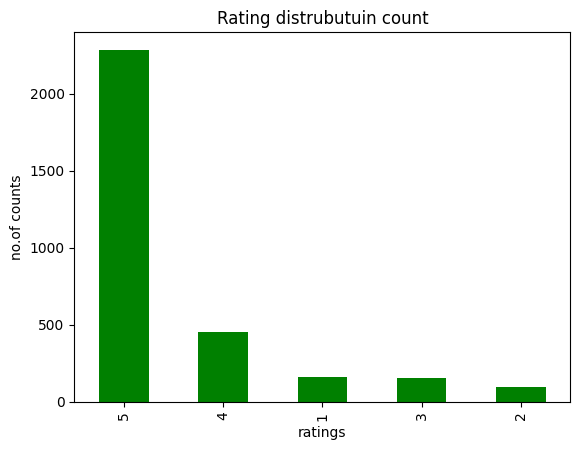

In [29]:
data['rating'].value_counts().plot.bar(color='green')
plt.title('Rating distrubutuin count')
plt.xlabel('ratings')
plt.ylabel('no.of counts')
plt.show()

In [30]:
print(f"rating count percentage distrubution :\n{round(data['rating'].value_counts()/data.shape[0]*100,2)}")

rating count percentage distrubution :
rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


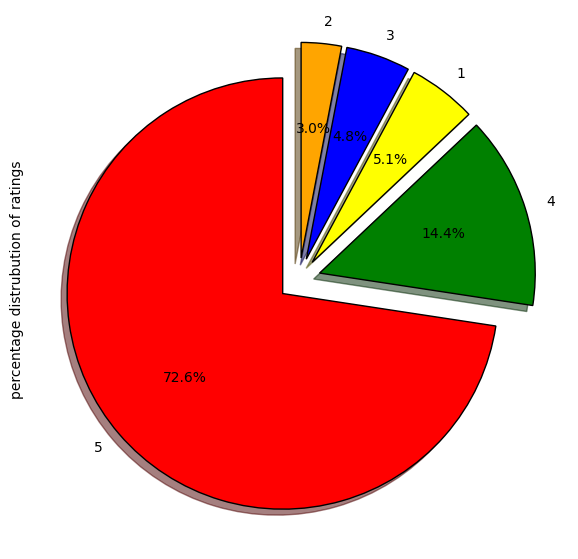

In [31]:
fig=plt.figure(figsize=(7,7))
colors = ('red','green','yellow','blue','orange')
wp={'linewidth':1,"edgecolor":'black'}
tags=data['rating'].value_counts()/data.shape[0]
explode=(0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie',autopct="%1.1f%%",shadow=True,colors=colors,startangle=90,wedgeprops=wp,explode=explode,label='percentage distrubution of ratings')
from io import BytesIO
graph=BytesIO


In [32]:
print(f"counts of feedback \n{data['feedback'].value_counts()}")

counts of feedback 
feedback
1    2893
0     256
Name: count, dtype: int64


In [33]:
review_0=data[data['feedback']==0].iloc[1]['verified_reviews']
print(review_0)

Sound is terrible if u want good music too get a bose


In [34]:
review_1=data[data['feedback']==1].iloc[1]['verified_reviews']
print(review_1)

Loved it!


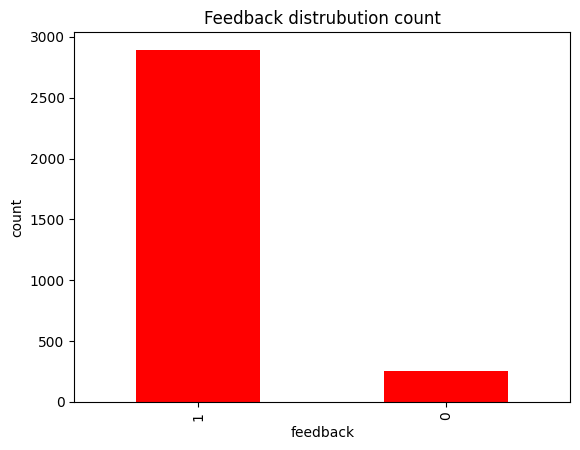

In [35]:
data['feedback'].value_counts().plot.bar(color='red')
plt.title('Feedback distrubution count')
plt.xlabel('feedback')
plt.ylabel('count')
plt.show()

In [36]:
print(f"feedback count percentage distrubution :\n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

feedback count percentage distrubution :
feedback
1    91.87
0     8.13
Name: count, dtype: float64


<Axes: ylabel='Percentage distrubution of feedback'>

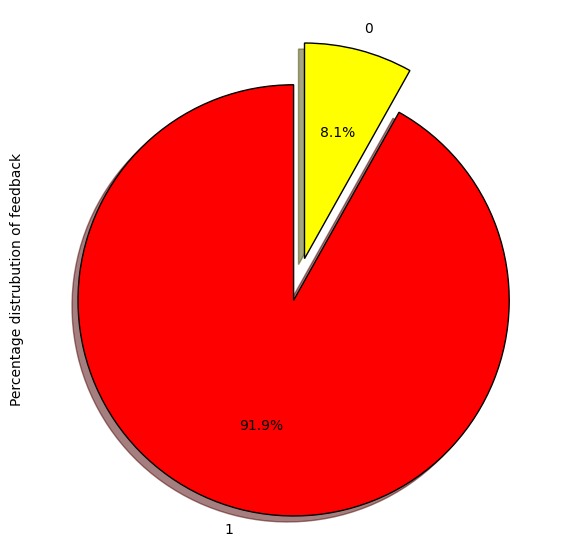

In [37]:
fig=plt.figure(figsize=(7,7))
colors=('red','yellow')
wp={'linewidth':1,"edgecolor":'black'}
tags=data['feedback'].value_counts()/data.shape[0]
explode=(0.1,0.1)
tags.plot(kind='pie',autopct='%1.1f%%',shadow=True,colors=colors,startangle=90,wedgeprops=wp,explode=explode,label='Percentage distrubution of feedback')

In [38]:
data[data['feedback']==0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [39]:
data[data['feedback']==1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

In [40]:
print(f"variations of the product count :\n{data['variation'].value_counts()}")

variations of the product count :
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


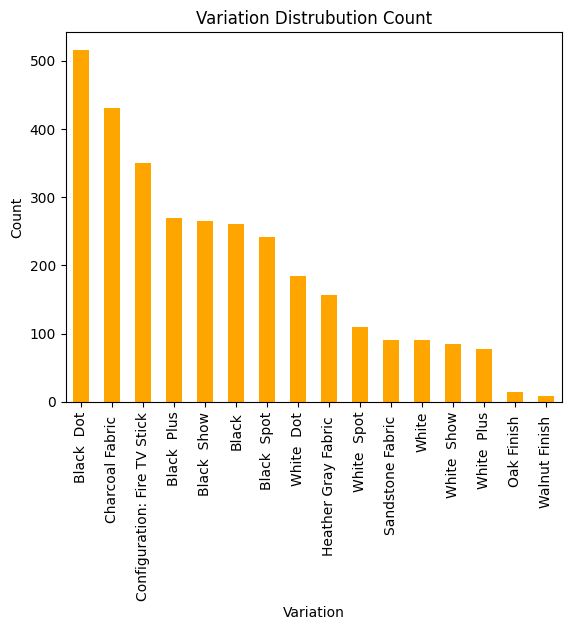

In [41]:
data['variation'].value_counts().plot.bar(color='orange')
plt.title('Variation Distrubution Count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

In [42]:
print(f"variation value count-percentage distrubution : \n{round(data['variation'].value_counts()/data.shape[0]*100,2)}")

variation value count-percentage distrubution : 
variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64


In [43]:
data.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

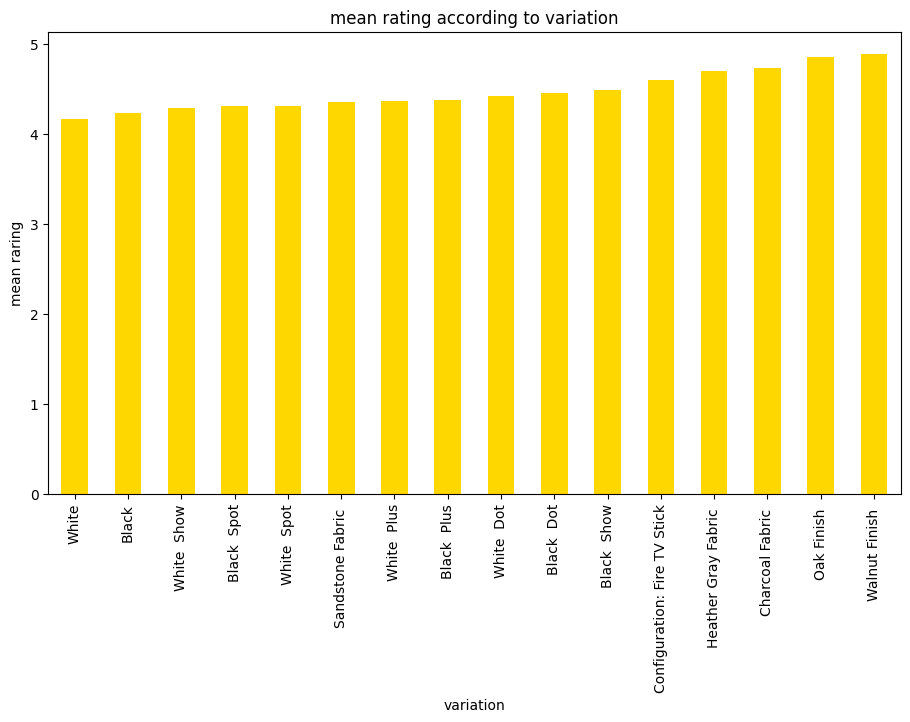

In [44]:
data.groupby('variation')['rating'].mean().sort_values().plot.bar(color='gold',figsize=(11,6))
plt.title('mean rating according to variation')
plt.xlabel('variation')
plt.ylabel('mean raring')
plt.show()

In [45]:
data['length'].describe()

count    3149.000000
mean      132.714513
std       182.541531
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

[Text(0.5, 1.0, 'Distrubution of length review')]

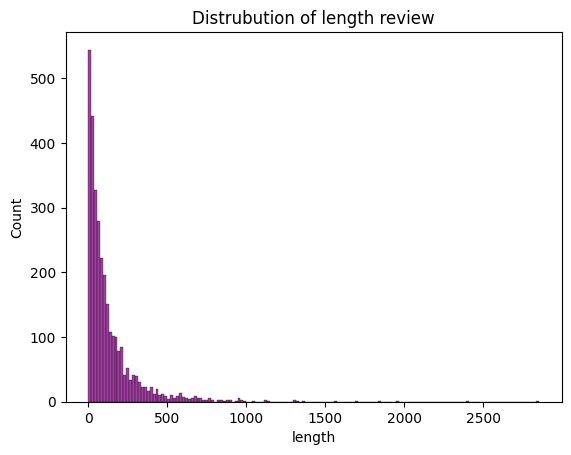

In [46]:
sns.histplot(data['length'],color='purple').set(title='Distrubution of length review')

<Axes: xlabel='length', ylabel='Count'>

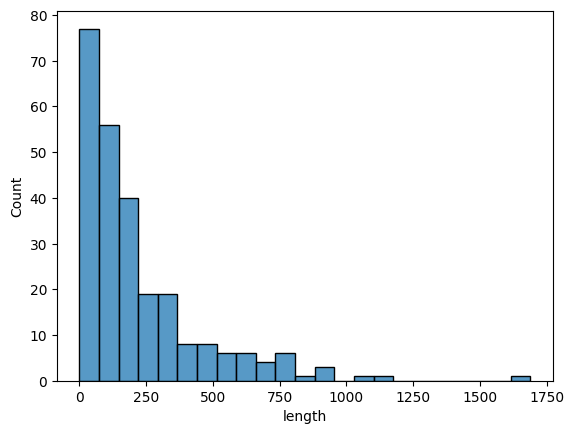

In [47]:
sns.histplot(data[data['feedback']==0]['length'])

<Axes: xlabel='length', ylabel='Count'>

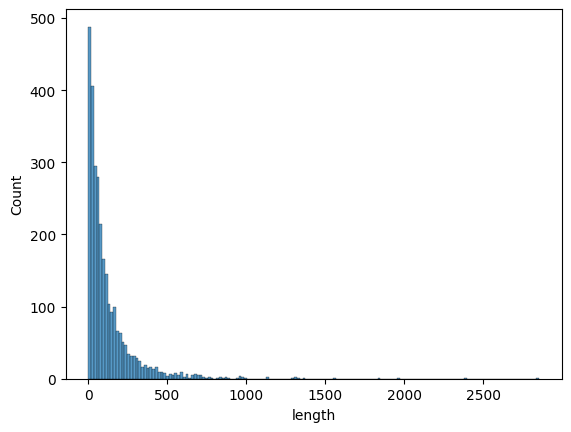

In [48]:
sns.histplot(data[data['feedback']==1]['length'])

Text(0.5, 0, 'rating')

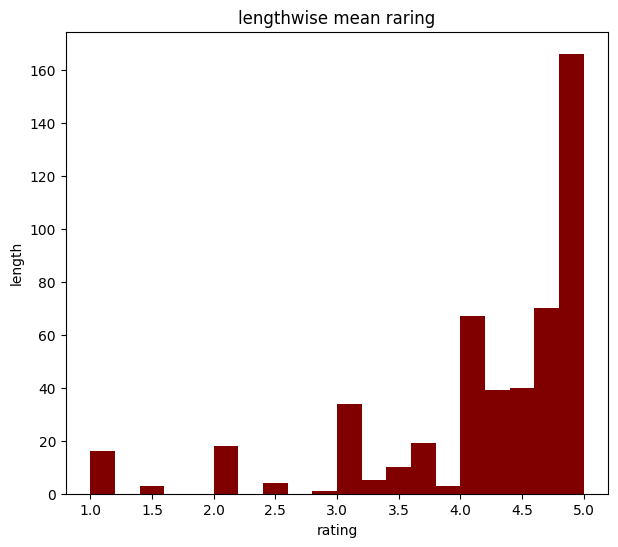

In [49]:
data.groupby('length')['rating'].mean().plot.hist(color='maroon',figsize=(7,6),bins=20)
plt.title('lengthwise mean raring')
plt.ylabel('length')
plt.xlabel('rating')

In [50]:
cv=CountVectorizer(stop_words='english')
words=cv.fit_transform(data.verified_reviews)

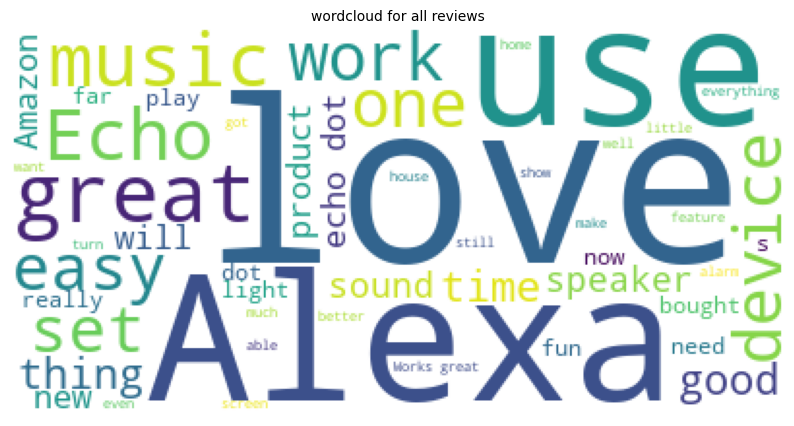

In [51]:
reviews=" ".join([review for review in data ['verified_reviews']])

wc=WordCloud(background_color='white',max_words=50)

plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('wordcloud for all reviews',fontsize=10)
plt.axis('off')
plt.show()

In [52]:
corpus=[]
stemmer=PorterStemmer()
for i in range(0,data.shape[0]):
    review=re.sub('[^a-zA-Z]','',data.iloc[i]['verified_reviews'])
    review=review.lower().split()
    review=[stemmer.stem(word) for word in review if not  word in STOPWORDS]
    review=''.join(review)
    corpus.append(review)

In [53]:
cv=CountVectorizer(max_features=2500)
x=cv.fit_transform(corpus).toarray()
y=data['feedback'].values

In [54]:
pickle.dump(cv,open('model_SA.pkl','wb'))

In [55]:
print(f"x shape :{x.shape}")
print(f'y shape :{y.shape}')


x shape :(3149, 2233)
y shape :(3149,)


In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=15)
print(f"x_train :{x_train.shape}")
print(f"x_test :{x_test.shape}")
print(f"y_train :{y_train.shape}")
print(f"y_test :{y_test.shape}")

x_train :(2204, 2233)
x_test :(945, 2233)
y_train :(2204,)
y_test :(945,)


In [57]:
print(f"x_train max value :{x_train.max()}")
print(f"x_test  max value :{x_test.max()}")

x_train max value :1
x_test  max value :1


In [58]:
from sklearn.preprocessing import MinMaxScaler


scaler=MinMaxScaler()
x_train_scl=scaler.fit_transform(x_train)
x_test_scl=scaler.transform(x_test)

In [59]:
pickle.dump(scaler,open('model_SA.pkl','wb'))

In [60]:
model_rf=RandomForestClassifier()
model_rf.fit(x_train_scl,y_train)

RandomForestClassifier()

In [61]:
print("training Accuracy :",model_rf.score(x_train_scl,y_train))
print("Testing Accuracy :",model_rf.score(x_test_scl,y_test))

training Accuracy : 0.9954627949183303
Testing Accuracy : 0.9375661375661376


In [62]:
y_preds=model_rf.predict(x_test_scl)


In [63]:
cm=confusion_matrix(y_test,y_preds)

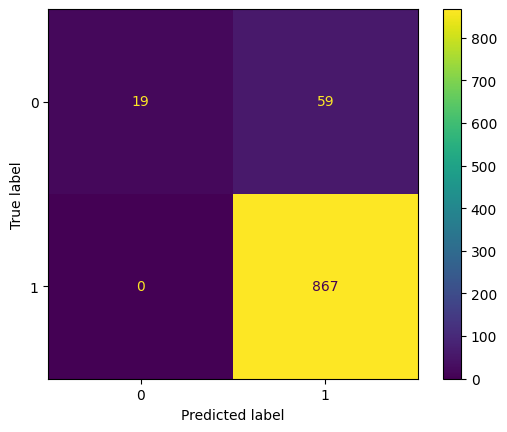

In [64]:
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

In [65]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=model_rf, X=x_train_scl, y=y_train, cv=10)
print("Accuracy:", accuracies.mean())
print("Standard Deviation:", accuracies.std())


Accuracy: 0.9283155080213904
Standard Deviation: 0.006941824271914912


In [66]:
params={
    'bootstrap' :[True],
    'max_depth' :[80,100],
    'min_samples_split' :[8,12],
    'n_estimators' :[100,300],
}

In [67]:
cv_object=StratifiedKFold(n_splits=2)
grid_search=GridSearchCV(estimator=model_rf,param_grid=params,cv=cv_object,verbose=0,return_train_score=True)
grid_search.fit(x_train_scl,y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [68]:
print("Best Parameter Combination : {}".format(grid_search.best_params_))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 8, 'n_estimators': 300}


In [69]:
print("cross validation mean accuracy for train set :{}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("cross validation mean accuracy for test set :{}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Accuracy score for Test set :",accuracy_score(y_test,y_preds))

cross validation mean accuracy for train set :95.84845735027223
cross validation mean accuracy for test set :92.19033575317604
Accuracy score for Test set : 0.9375661375661376


Xgboost

In [70]:
model_xgb=XGBClassifier()
model_xgb.fit(x_train_scl,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [71]:
print(f"Train set accuracy :{model_xgb.score(x_train_scl,y_train)}")
print(f"Test set accuracy :{model_xgb.score(x_test_scl,y_test)}")

Train set accuracy :0.9192377495462795
Test set accuracy :0.9174603174603174


In [72]:
y_preds=model_xgb.predict(x_test)

In [74]:
cm=confusion_matrix(y_test,y_preds)
cm


array([[  0,  78],
       [  0, 867]], dtype=int64)

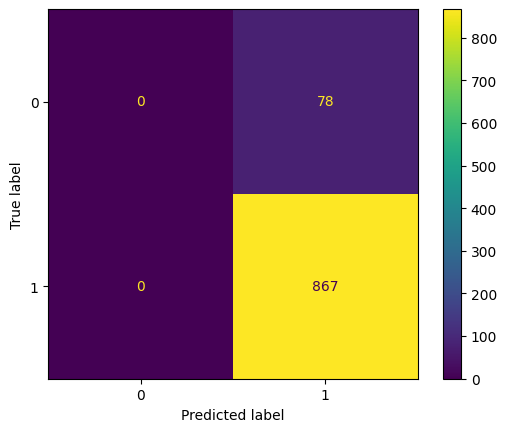

In [75]:
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()